# 2. Dynamically Inserting into a Database Table with SQLite

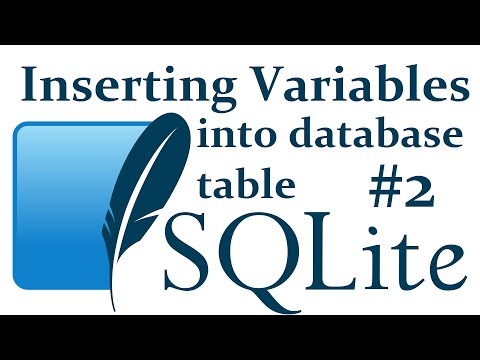

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('qfGu0fBfNBs')

## 2.1 Existing code 

In [8]:
import sqlite3

# Connect to the database called 'tutorial.db'. If it does't exist, it will be created.
# If it does exist, it will NOT be overwritten or re-created.
conn = sqlite3.connect('tutorial.db')

# Get the cursor which can select/delete/add things and so on.
c = conn.cursor()

def create_table():
    # Create a table called stuffToPlot if it doesn't exist. This table contains the following columns: 
    # unix, datestamp, keyword, value.
    c.execute("CREATE TABLE IF NOT EXISTS stuffToPlot(unix REAL, datestamp TEXT, keyword TEXT, value REAL)")
    
def insert_data_entry():
    # The cursor executes an SQL query "INSERT INTO" to insert a tuple of values into the table 'stuffToPlot'.
    c.execute("INSERT INTO stuffToPlot VALUES(1452549219, '2016-01-11 13:53:39', 'Python', 6)")
    
    # Commit the SQL query "INSERT INTO" and save the change in the table. 
    conn.commit()
    
    # Comment out the closure code to improve the efficiency.
    # c.close()
    # conn.close()

## 2.2 Insert a dynamic entry.

In [9]:
import time
import datetime
import random

def insert_dynamic_data_entry():
    unix = int(time.time())
    date = str(datetime.datetime.fromtimestamp(unix).strftime('%Y-%m-%d %H:%M:%S'))
    keyword = "Python"
    value = random.randrange(0, 10)
    
    # While SQLite uses "?" as the placeholder of the input variable, MySQL uses "%s".
    c.execute("INSERT INTO stuffToPlot (unix, datestamp, keyword, value) VALUES (?, ?, ?, ?)",
             (unix, date, keyword, value))
    
    conn.commit()

## 2.3 Put it altogether.

In [10]:
#create_table()
#insert_date_entry()

for i in range(10):
    insert_dynamic_data_entry()
    time.sleep(1) # Sleep for 1 second.
    
c.close()
conn.close()